# Extensisq methods & Lotka-Volterra problem

The extensisq methods are compared to the explicit runge kutta methods of scipy on the Lotka-Volterra problem (predator prey model). This problem was copied from the solve_ivp page in scipy's reference manual.

## Problem definition
The parameters of this problem are defined as additional arguments `arg` to the derivative function.

In [1]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

problem = {'fun' : lotkavolterra,
            'y0' : [10., 5.],
        't_span' : [0., 15.],
          'args' : (1.5, 1, 3, 1)}

## Reference solution

First a reference solution is created by solving this problem with low tolerance.

In [2]:
from scipy.integrate import solve_ivp

reference = solve_ivp(**problem, atol=1e-12, rtol=1e-12, method='DOP853', dense_output=True)

## Solution plot

This solution has derivatives that change rapidly.

<IPython.core.display.Javascript object>


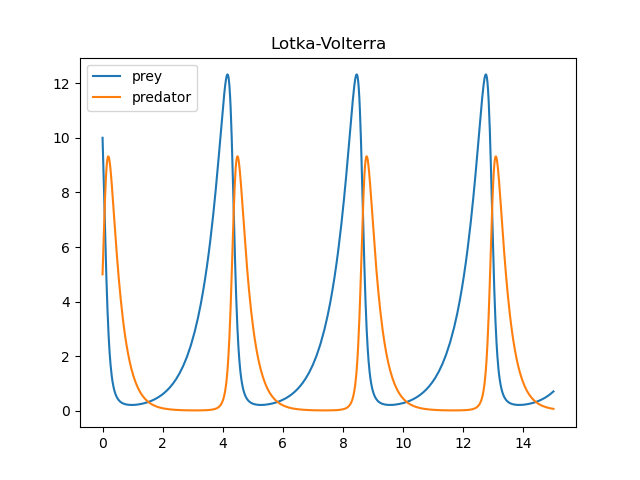

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.plot(reference.t, reference.y.T)
plt.title('Lotka-Volterra')
plt.legend(('prey', 'predator'))
plt.show()

## Efficiency plot

Let's solve this problem with the explicit runge kutta methods of scipy (`RK45` and `DOP853`) and those of extensisq (`Ts45`, `BS45`, `BS45_i`, `CK45` and `CK45_o`) at a few absolute tolerance values and make a plot to compare their efficiency. The bottom left corner of that plot is the efficiency sweet spot: low error and few fuction evaluations.

<IPython.core.display.Javascript object>


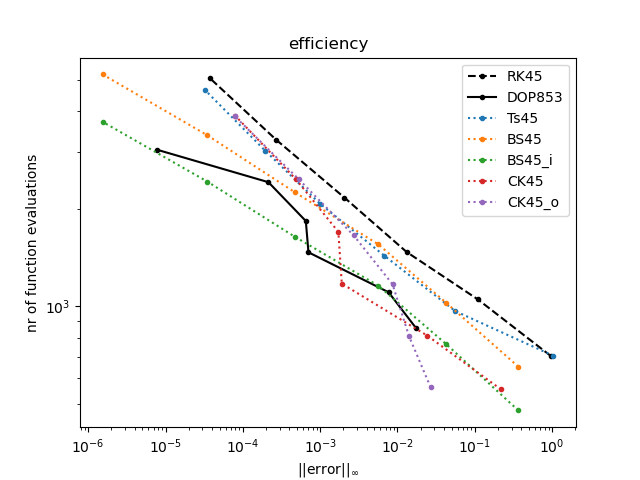

In [4]:
import numpy as np
from extensisq import *

methods = ['RK45', 'DOP853', Ts45, BS45, BS45_i, CK45, CK45_o]
tolerances = np.logspace(-4, -9, 6)

plt.figure()
for method in methods:
    name = method if isinstance(method, str) else method.__name__
    e = []
    n = []
    for tol in tolerances:
        sol = solve_ivp(**problem, rtol=1e-13, atol=tol, method=method,
                       dense_output=True) # only to separate BS45 and BS45_i
        err = sol.y - reference.sol(sol.t)
        e.append(np.linalg.norm(err, np.inf))
        n.append(sol.nfev)
    if name == 'RK45':
        style = '--k.'
    elif name == 'DOP853':
        style = '-k.'
    else:
        style = '.:'
    plt.loglog(e, n, style, label=name)
plt.legend()
plt.xlabel(r'||error||$_{\infty}$')
plt.ylabel('nr of function evaluations')
plt.title('efficiency')
plt.show()     

## Discussion

The efficiency graph shows:
* `RK45` has the poorest efficiency of all considered methods.
* `Ts45` is quite similar to `RK45`, but just a bit better.
* `BS45` and `BS45_i` are the most efficient fifth order methods for lower (tighter) tolerances. These two methods have exactly the same accuracy, but `BS45` needs more evaluations for its accurate interpolant. That interpolant is not used in this case. It was only enabeled, by setting `dense_output=True`, to show the difference with respect to `BS45_i`.
* `CK45` and `CK45_o` are the most efficient methods at higher (looser) tolerances. The performance at lower tolerance is similar to `Ts45`.
* `DOP853` is a higher order method (eighth). Typically, it is more efficient at lower tolerance, but for this problem it does not work so well.

These observation may not be valid for other problems.
